In [1]:
#Analyze the given dataset and create a multi-regression model to predict house price
#import relevant modules
#define variables
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
import sklearn

In [3]:
#load the file
df_main = pd.read_csv('/Users/ojasbardiya/Downloads/Bengaluru_House_Data.csv')
df_main.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
#get the dimensions
df_main.shape
df_main.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
#drop null values
df_main.dropna(inplace=True)

In [6]:
#analyzing availability vs location
locations = df_main['location'].unique()
len(locations)
df_main.groupby(['location', 'availability']).agg('count')

area_type  size  society  \
location                       availability                              
 Banaswadi                     Ready To Move          1     1        1   
 Bhoganhalli                   19-Dec                 1     1        1   
 Devarabeesana Halli           Ready To Move          4     4        4   
 Devarachikkanahalli           Ready To Move          8     8        8   
 Electronic City               Ready To Move          2     2        2   
 Rachenahalli                  18-May                 1     1        1   
                               20-Aug                 1     1        1   
 Thanisandra                   18-Nov                 1     1        1   
                               21-Nov                 1     1        1   
                               Ready To Move          1     1        1   
 Whitefield                    17-Jun                 1     1        1   
1 Giri Nagar                   Ready To Move          1     1        1   
1st Block Jayanagar            15-Dec                 1     1        1   
1st Block Koramangala          Ready To Move          2     2        2   
1st Phase JP Nagar             18-May                 3     3        3   
                               Ready To Move         11    11       11   
2nd Block Hrbr Layout          Ready To Move          1     1        1   
2nd Block Jayanagar            Ready To Move          1     1        1   
2nd Phase JP Nagar             Ready To Move          2     2        2   
2nd Stage Arekere Mico Layout  Ready To Move          1     1        1   
3rd Block Hrbr Layout          Ready To Move          4     4        4   
3rd Block Koramangala          Ready To Move          1     1        1   
3rd Phase JP Nagar             Ready To Move          1     1        1   
4th Block Koramangala          Ready To Move          1     1        1   
5th Phase JP Nagar             Ready To Move         17    17       17   
6th Phase JP Nagar             Ready To Move          8     8        8   
6th block Koramangala          Ready To Move          2     2        2   
7th Block Jayanagar            Ready To Move          2     2        2   
7th Phase JP Nagar             19-Dec                 3     3        3   
                               Ready To Move         95    95       95   
...                                                 ...   ...      ...   
Whitefield                     Ready To Move        260   260      260   
Wilson Garden                  Ready To Move          3     3        3   
Yelachenahalli                 Ready To Move          8     8        8   
Yelahanka                      15-Aug                 1     1        1   
                               17-Dec                 1     1        1   
                               17-Nov                 1     1        1   
                               18-Apr                 3     3        3   
                               18-Dec                 1     1        1   
                               18-Feb                 1     1        1   
                               18-Jan                 2     2        2   
                               18-Jul                 1     1        1   
                               18-Mar                 6     6        6   
                               18-May                 3     3        3   
                               19-Apr                 1     1        1   
                               19-Aug                 1     1        1   
                               19-Dec                10    10       10   
                               19-Jul                 1     1        1   
                               19-Mar                 3     3        3   
                               20-Dec                 1     1        1   
                               20-Jan                 2     2        2   
                               21-Mar                 4     4        4   
                               Ready To Move      

In [7]:
#finding out no. of distinct entries in society
df_main['society'].value_counts(ascending=False)

GrrvaGr    80
PrarePa    71
Sryalan    59
Prtates    58
GMown E    56
Bhmesy     50
Prityel    50
Prarkun    49
PrityTr    49
Prtanha    49
Dhalsh     47
SNity S    40
IBityin    39
Soresea    39
Soitya     36
Bhe 2ko    35
Adeatlm    35
SunceEs    34
Rosha I    34
SNnia E    31
JRrnauv    30
MenueNo    29
Prlla C    28
PuandHi    27
Prncyrn    27
RothaVa    27
Raard B    26
Aklia R    26
GoAirej    26
Puachal    25
           ..
PronsAs     1
Srkha S     1
Srncyya     1
EsaceLe     1
BrriaIm     1
Rintspa     1
TGeepga     1
RortsCo     1
SLowse      1
Sanetra     1
Baalp S     1
Rerelve     1
Diensso     1
Asmosz      1
Saentva     1
Honcyju     1
Omaveai     1
Thowsil     1
SNadeAr     1
FlsicFl     1
Dhowsyo     1
KAMESRI     1
Suelsa      1
Soite E     1
Hoeatan     1
DSionhe     1
Asncy P     1
Roareta     1
Srayai      1
Pao 2Sm     1
Name: society, Length: 2592, dtype: int64

In [8]:
#check
df_main.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

Text(0.5, 1.0, 'Area type vs Mean Price')

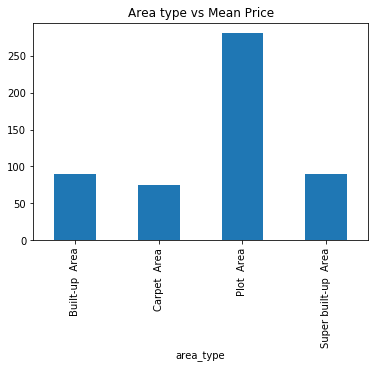

In [9]:
#Basic visualizations before filtering the data
df_main.groupby('area_type')['price'].mean().plot(kind='bar')
plt.title('Area type vs Mean Price')

Text(0.5, 1.0, 'No. of Balcony vs Mean Price (Before applying Filter)')

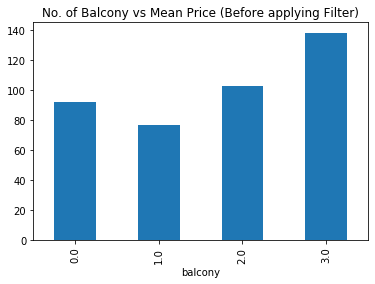

In [10]:
df_main.groupby('balcony')['price'].mean().plot(kind='bar')
plt.title('No. of Balcony vs Mean Price (Before applying Filter)')

Text(0.5, 1.0, 'No. of Baths vs Mean Price (Before applying Filter)')

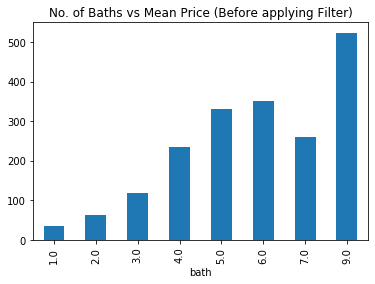

In [11]:
df_main.groupby('bath')['price'].mean().plot(kind='bar')
plt.title('No. of Baths vs Mean Price (Before applying Filter)')

In [12]:
#drop irrelevant columns for final regression model
df_second = df_main.drop(['society', 'availability', 'area_type'], axis='columns')

In [13]:
#check
df_second.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
5,Whitefield,2 BHK,1170,2.0,1.0,38.00
11,Whitefield,4 Bedroom,2785,5.0,3.0,295.00


In [14]:
#find out balcony counts
df_second.groupby('balcony')['balcony'].agg('count')

balcony
0.0     402
1.0    2975
2.0    3114
3.0    1005
Name: balcony, dtype: int64

In [15]:
#check
df_second.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
5,Whitefield,2 BHK,1170,2.0,1.0,38.00
11,Whitefield,4 Bedroom,2785,5.0,3.0,295.00


In [16]:
#find no. of distinct room sizes
sizes = df_second['size'].unique()
len(sizes)

15

In [17]:
#check
df_second.groupby('size')['size'].agg('count')

size
1 BHK         353
1 RK           10
11 BHK          1
2 BHK        3411
2 Bedroom      16
3 BHK        3012
3 Bedroom     120
4 BHK         347
4 Bedroom     193
5 BHK           9
5 Bedroom      16
6 BHK           3
6 Bedroom       3
7 BHK           1
9 BHK           1
Name: size, dtype: int64

In [18]:
#make sure no na values are left
df_second.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [19]:
#create a new column from sizes that only has the no. of beds
df_second['bhk'] = df_second['size'].apply(lambda x: int(x.split(' ')[0]))

In [20]:
#check
df_second['bhk'].unique()

array([ 2,  4,  3,  1,  5, 11,  9,  6,  7])

Text(0.5, 1.0, 'BHK vs Mean Price')

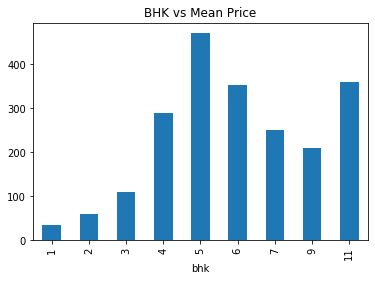

In [21]:
df_second.groupby('bhk')['price'].mean().plot(kind='bar')
plt.title('BHK vs Mean Price')

In [22]:
#for converting sq.ft into a float when a range is given
#average of the range is taken as the final value
def convert_sqft(x):
    t = x.split('-')
    if len(t) == 2:
        return (float(t[0]) + float(t[1]))/2
    try :
        return float(x)
    except:
        return None

In [23]:
#apply the function
df_second.total_sqft = df_second.total_sqft.apply(convert_sqft)
df_third = df_second[df_second.total_sqft.notnull()]

In [24]:
#check
df_third.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2
11,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4


In [25]:
#get the distribution of sq. ft
df_third.groupby('total_sqft')['total_sqft'].agg('count')

total_sqft
11.0       1
60.0       1
284.0      1
296.0      1
350.0      1
360.0      1
381.0      2
395.0      1
400.0      6
412.5      1
416.0      3
418.0      2
420.0      1
435.0      3
440.0      2
445.0      1
450.0      4
451.0      1
458.0      2
460.0      2
469.0      1
475.0      1
485.0      1
488.0      1
492.0      1
497.0      4
500.0      8
509.0      2
510.0      2
520.0      5
          ..
5020.0     1
5150.0     1
5200.0     1
5230.0     1
5384.0     1
5400.0     5
5480.0     1
5515.0     1
5530.0     1
5611.5     1
5656.0     1
5667.5     1
5700.0     1
5924.0     1
6000.0     1
6200.0     1
6652.0     2
6688.0     1
7200.0     1
7500.0     1
8321.0     1
8400.0     1
9600.0     1
10000.0    1
10200.0    1
11000.0    1
11338.0    1
14000.0    1
35000.0    1
36000.0    1
Name: total_sqft, Length: 1623, dtype: int64

In [26]:
#avg sq.ft per bedroom
avg = np.mean(df_third.total_sqft/df_second.bhk)
print(avg)

588.4244304219077


In [27]:
#get the std. deviation
std_dev = np.std(df_third.total_sqft/df_second.bhk)
print(std_dev)

224.95104524862015


In [28]:
#get distibution of baths
df_third.groupby('bath')['bath'].agg('count')

bath
1.0     427
2.0    4280
3.0    2054
4.0     456
5.0     184
6.0      73
7.0       4
9.0       3
Name: bath, dtype: int64

In [29]:
#filter out outliers
df_third = df_third.drop(df_third[df_third['bath']>6].index)

In [30]:
#filter out outliers
df_third = df_third.drop(df_third[df_third['bhk']>7.0].index)

In [31]:
#check
df_third.groupby('bath')['bath'].agg('count')

bath
1.0     427
2.0    4280
3.0    2054
4.0     456
5.0     184
6.0      73
Name: bath, dtype: int64

In [32]:
#check
df_third.groupby('size')['size'].agg('count')

size
1 BHK         351
1 RK           10
2 BHK        3410
2 Bedroom      15
3 BHK        3007
3 Bedroom     116
4 BHK         347
4 Bedroom     191
5 BHK           6
5 Bedroom      15
6 BHK           2
6 Bedroom       3
7 BHK           1
Name: size, dtype: int64

Text(0.5, 1.0, 'No. of Balcony vs Mean Price (After applying Filter)')

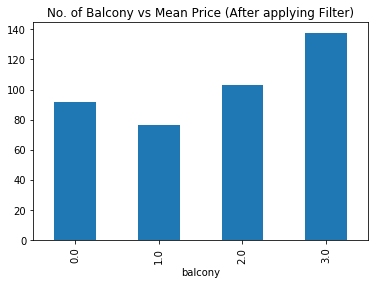

In [33]:
#Basic visualizations continued
df_third.groupby('balcony')['price'].mean().plot(kind='bar')
plt.title('No. of Balcony vs Mean Price (After applying Filter)')

Text(0.5, 1.0, 'No. of Bath vs Mean Price (After applying Filter)')

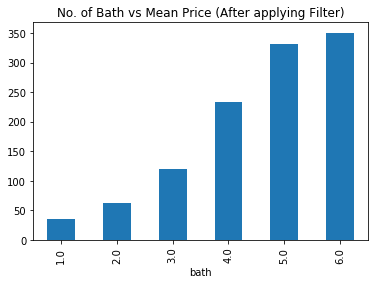

In [34]:
df_third.groupby('bath')['price'].mean().plot(kind='bar')
plt.title('No. of Bath vs Mean Price (After applying Filter)')

In [35]:
#find out the price per sq. ft and add as a column
df_third['price_per_sqft'] = df_third['price']*100000/df_third['total_sqft']
df_third.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
11,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,10592.459605


In [36]:
df_third = df_third[~(df_third.total_sqft/df_third.bhk < 300)]

In [37]:
df_third.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
11,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,10592.459605


In [38]:
#define a function remove variables that are more 1 standard deviation from the mean for price_per_sqft
def remove_outliers(data, parameter):
    df_final = pd.DataFrame()
    for key, s_data in data.groupby(parameter):
        avg = np.mean(s_data.price_per_sqft)
        std_dev = np.std(s_data.price_per_sqft)
        filtered_df = s_data[(s_data.price_per_sqft>(avg-std_dev)) & (s_data.price_per_sqft<=(avg+std_dev))]
        df_final = pd.concat([df_final,filtered_df],ignore_index=True)
    return df_final

In [39]:
#apply the function
df_fourth = remove_outliers(df_third, 'location')
df_fourth.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Devarabeesana Halli,3 BHK,1672.0,3.0,2.0,150.0,3,8971.291866
1,Devarabeesana Halli,3 BHK,1750.0,3.0,3.0,149.0,3,8514.285714
2,Devarabeesana Halli,3 BHK,1750.0,3.0,2.0,150.0,3,8571.428571
3,Devarachikkanahalli,3 BHK,1425.0,2.0,2.0,65.0,3,4561.403509
4,Devarachikkanahalli,3 BHK,1705.0,3.0,2.0,75.0,3,4398.826979


In [40]:
#filter out cases with only 2 BHK
df_fourth_2bhk = df_fourth[df_fourth.bhk == 2]

Text(0.5, 1.0, 'Variation of price per sqft in the case of 2 BHK')

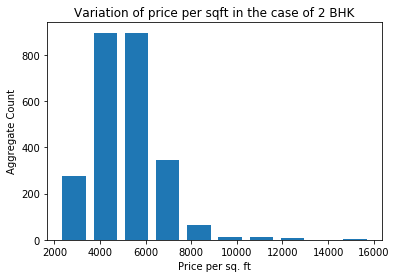

In [41]:
#Get distribution of price per sq. ft for 2 BHK
plt.hist(df_fourth_2bhk.price_per_sqft,rwidth=0.75)
plt.xlabel('Price per sq. ft')
plt.ylabel('Aggregate Count')
plt.title('Variation of price per sqft in the case of 2 BHK')

In [42]:
#filter out cases with only 3 BHK
df_fourth_3bhk = df_fourth[df_fourth.bhk == 3]

Text(0.5, 1.0, 'Variation of price per sqft in the case of 3 BHK')

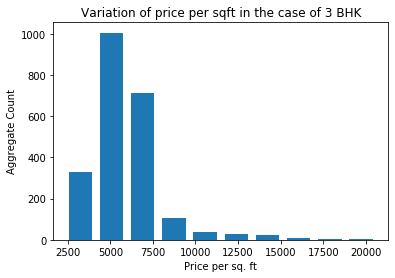

In [43]:
#Get distribution of price per sq. ft for 3 BHK
plt.hist(df_fourth_3bhk.price_per_sqft,rwidth=0.75)
plt.xlabel('Price per sq. ft')
plt.ylabel('Aggregate Count')
plt.title('Variation of price per sqft in the case of 3 BHK')

In [44]:
#remove spaces from the beginning and to ensure accurate counts
df_fourth.location = df_fourth.location.str.strip()

In [45]:
#store values in a series
location_order_desc = df_fourth['location'].value_counts(ascending=False)

In [46]:
print(location_order_desc)

Whitefield                  357
Sarjapur  Road              237
Electronic City             217
Kanakpura Road              157
Yelahanka                   141
Thanisandra                 141
Hebbal                      108
Raja Rajeshwari Nagar       108
Hennur Road                 104
Bannerghatta Road            94
Electronic City Phase II     86
Uttarahalli                  81
7th Phase JP Nagar           67
Chandapura                   66
Haralur Road                 65
Marathahalli                 61
Begur Road                   53
Yeshwanthpur                 51
Bellandur                    49
Budigere                     44
Jakkur                       42
Old Madras Road              42
Bisuvanahalli                42
Thigalarapalya               42
Ramagondanahalli             42
Sarjapur                     41
Hoodi                        41
KR Puram                     41
Harlur                       41
Electronics City Phase 1     40
                           ... 
Jaya Mah

In [47]:
#determine and classify outliers
locations_less_than_ten = location_order_desc[location_order_desc < 10]
print(np.mean(location_order_desc))
print(len(locations_less_than_ten))
df_fourth.location = df_fourth.location.apply(lambda x: 'outlier' if x in locations_less_than_ten else x)

12.523364485981308
310


In [48]:
#remove outliers
df_fourth = df_fourth[df_fourth.location != 'outlier']

In [49]:
#check
top10_location = df_fourth['location'].value_counts(ascending=False).head(10)
top10_location

Whitefield               357
Sarjapur  Road           237
Electronic City          217
Kanakpura Road           157
Yelahanka                141
Thanisandra              141
Raja Rajeshwari Nagar    108
Hebbal                   108
Hennur Road              104
Bannerghatta Road         94
Name: location, dtype: int64

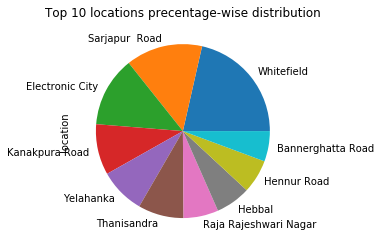

In [50]:
#Pie chart representing top 10 locations
top10_location.plot(kind='pie', title='Top 10 locations precentage-wise distribution')

In [51]:
#check
df_fourth.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
8,Electronic City,1 RK,550.0,1.0,1.0,27.00,1,4909.090909
9,Rachenahalli,1 RK,440.0,1.0,0.0,28.00,1,6363.636364
10,Thanisandra,1 RK,510.0,1.0,0.0,25.25,1,4950.980392
11,Thanisandra,1 RK,510.0,1.0,1.0,25.25,1,4950.980392
25,5th Phase JP Nagar,2 BHK,1150.0,3.0,3.0,52.50,2,4565.217391


In [52]:
#determine outliers in terms of difference betwene bedroom and bathrooms
df_fourth.groupby(df_fourth.bhk - df_fourth.bath).agg('count')

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
-3.0,1,1,1,1,1,1,1,1
-2.0,42,42,42,42,42,42,42,42
-1.0,218,218,218,218,218,218,218,218
0.0,3508,3508,3508,3508,3508,3508,3508,3508
1.0,627,627,627,627,627,627,627,627
2.0,2,2,2,2,2,2,2,2


In [53]:
#remove outliers
df_fourth = df_fourth[df_fourth.bath < df_fourth.bhk + 2]

In [54]:
#define function to to create scatterplots based on a current location
def scatter_plotfunc(df, location):
    two_bed = df[(df.location == location) & (df.bhk == 2)]
    three_bed = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (20, 10)
    plt.scatter(two_bed.total_sqft,two_bed.price,color='red',label='2 BHK', s=50)
    plt.scatter(three_bed.total_sqft,three_bed.price,marker='+', color='blue',label='3 BHK', s=50)
    plt.xlabel('Plot Size (sq. ft)')
    plt.ylabel('Price (in Lakhs of Rupees)')
    plt.title(location)
    plt.legend()
    

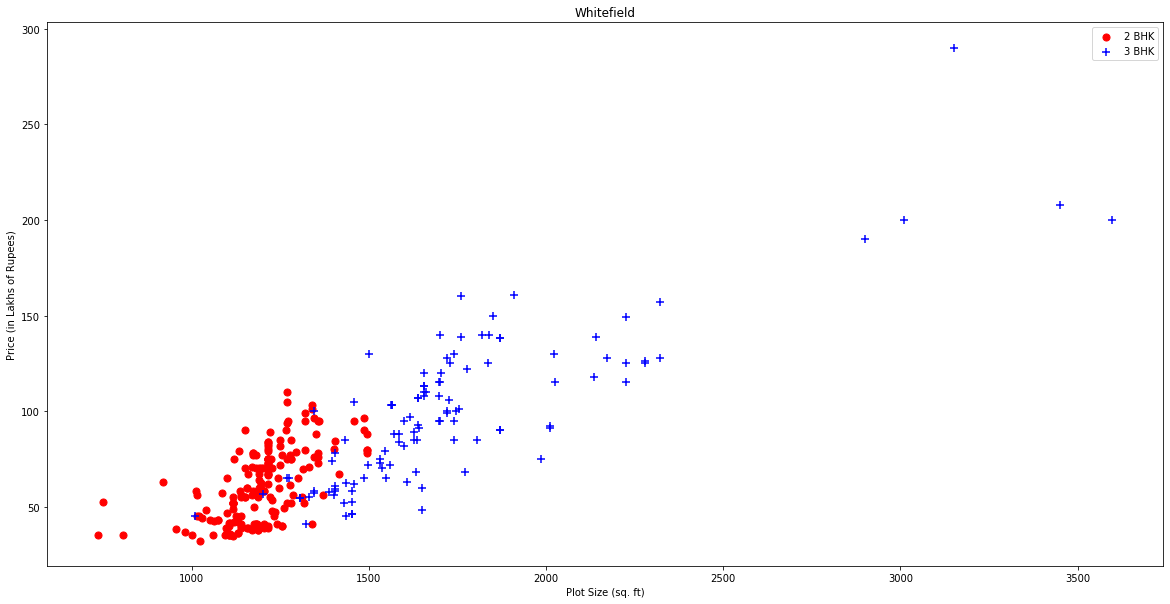

In [55]:
#apply function
scatter_plotfunc(df_fourth, 'Whitefield')

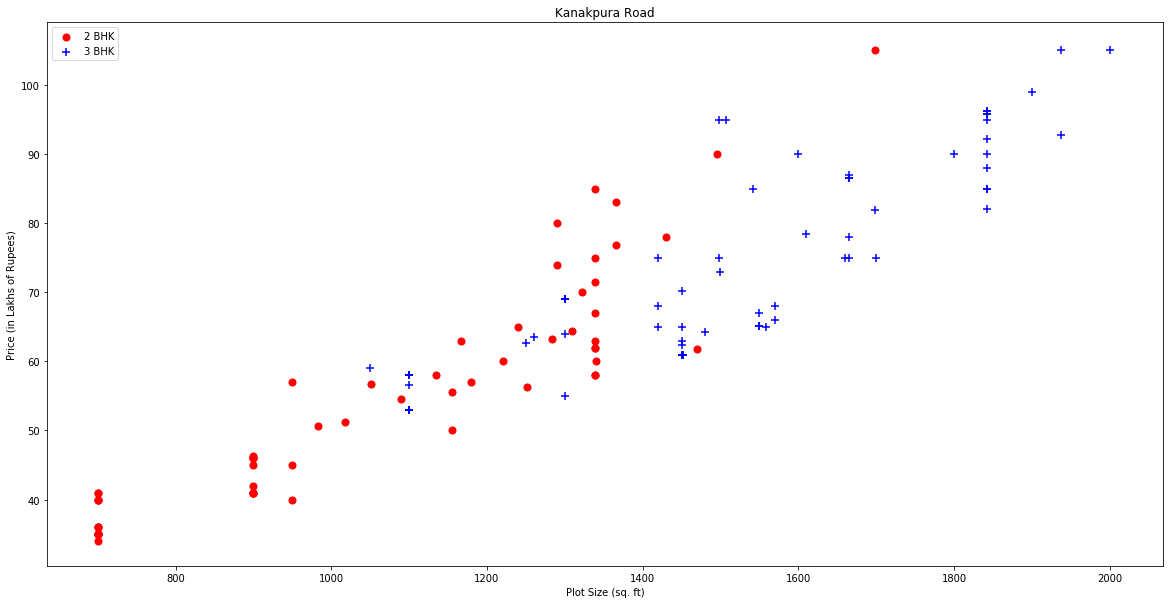

In [56]:
#apply function
scatter_plotfunc(df_fourth, 'Kanakpura Road')

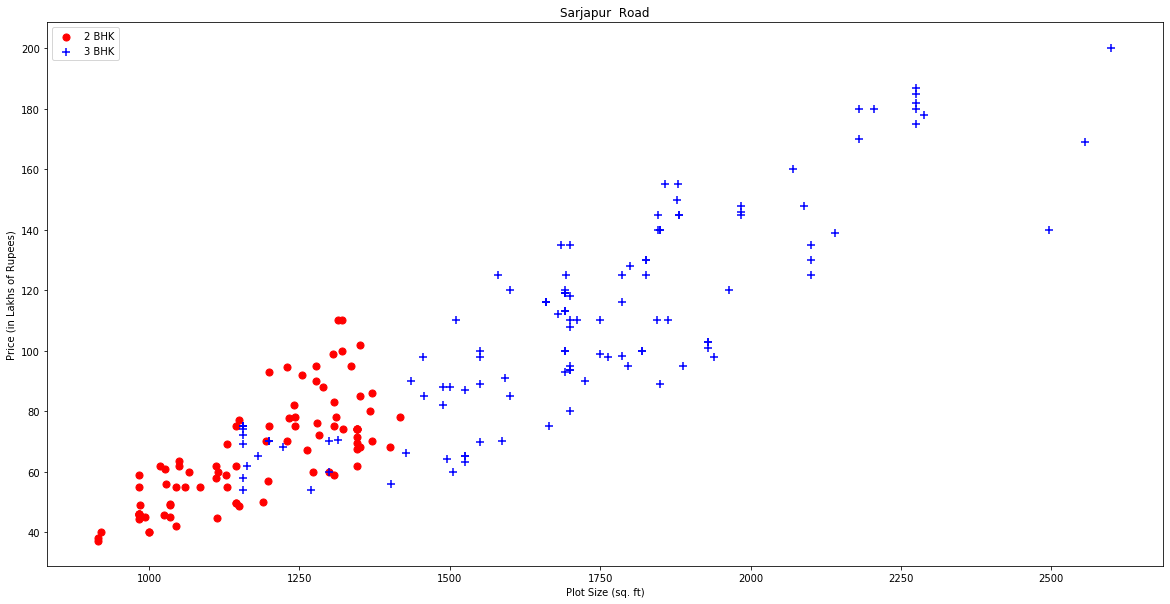

In [57]:
scatter_plotfunc(df_fourth, 'Sarjapur  Road')

Text(0.5, 1.0, 'Distribution of price_per_sqft (before filtering)')

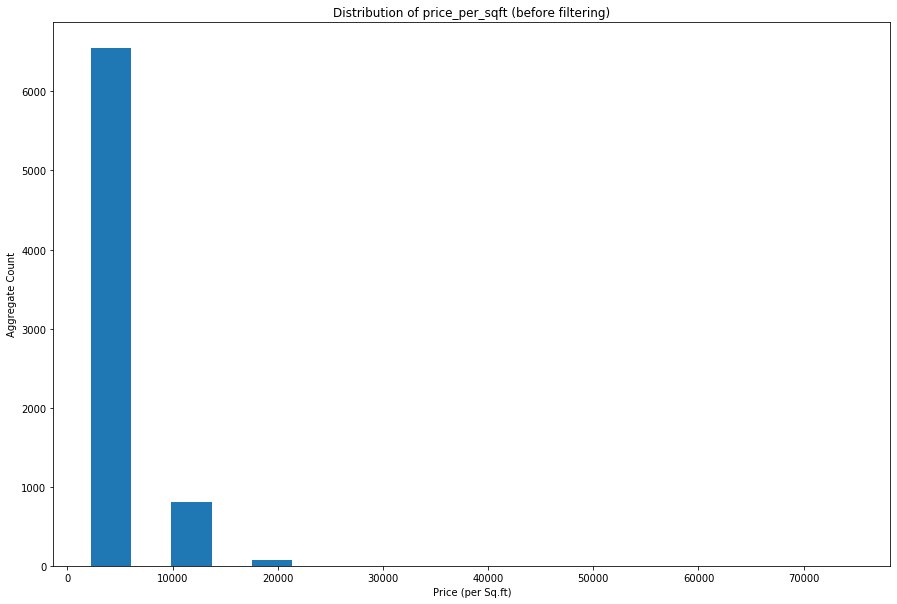

In [58]:
#get a distribution of price_per_sqft before filtering
#set the range
matplotlib.rcParams['figure.figsize'] = (15,10)
plt.hist(df_third.price_per_sqft,rwidth=0.5)
plt.xlabel('Price (per Sq.ft)')
plt.ylabel('Aggregate Count')
plt.title('Distribution of price_per_sqft (before filtering)')

Text(0.5, 1.0, 'Distribution of price_per_sqft (after filtering)')

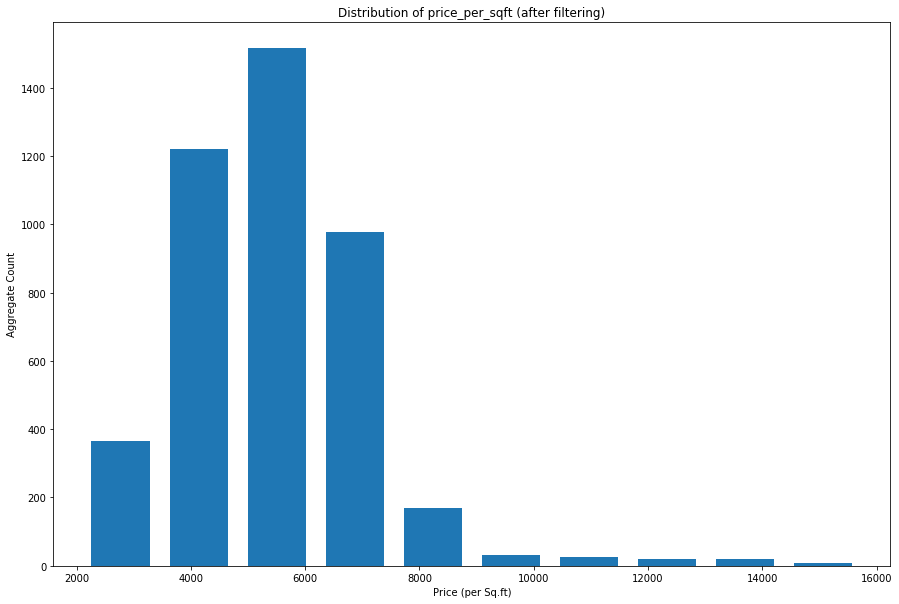

In [59]:
#get a distribution of price_per_sqft after filtering
#include more charts
#provide titles
matplotlib.rcParams['figure.figsize'] = (15,10)
plt.hist(df_fourth.price_per_sqft,rwidth=0.75)
plt.xlabel('Price (per Sq.ft)')
plt.ylabel('Aggregate Count')
plt.title('Distribution of price_per_sqft (after filtering)')

Text(0.5, 1.0, 'Distribution of total sq. ft')

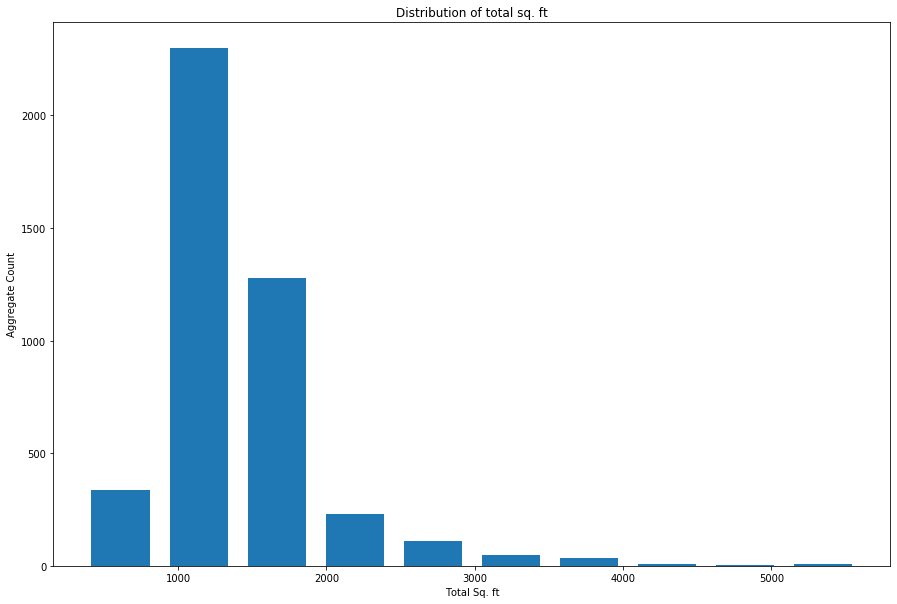

In [60]:
#distribution of total_sq_ft
#fix the range
matplotlib.rcParams['figure.figsize'] = (15,10)
plt.hist(df_fourth.total_sqft,rwidth=0.75)
plt.xlabel('Total Sq. ft')
plt.ylabel('Aggregate Count')
plt.title('Distribution of total sq. ft')

In [61]:
df_main.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          1158
Carpet  Area              52
Plot  Area               269
Super built-up  Area    6017
Name: area_type, dtype: int64

In [62]:
#start creating predictor and response variables
df_final1 = df_fourth.drop(['size', 'price_per_sqft'], axis=1)
df_final1.head()

,location,total_sqft,bath,balcony,price,bhk
8,Electronic City,550.0,1.0,1.0,27.00,1
9,Rachenahalli,440.0,1.0,0.0,28.00,1
10,Thanisandra,510.0,1.0,0.0,25.25,1
11,Thanisandra,510.0,1.0,1.0,25.25,1
25,5th Phase JP Nagar,1150.0,3.0,3.0,52.50,2


In [63]:
#create a separate dataframe for storing categorical variables
dummies = pd.get_dummies(df_fourth.location)
dummies.head()

,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Anandapura,Ardendale,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
#merge the two
df_final1 = pd.concat([df_final1,dummies],axis='columns')
df_final1.head()

,location,total_sqft,bath,balcony,price,bhk,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
8,Electronic City,550.0,1.0,1.0,27.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Rachenahalli,440.0,1.0,0.0,28.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,Thanisandra,510.0,1.0,0.0,25.25,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Thanisandra,510.0,1.0,1.0,25.25,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,5th Phase JP Nagar,1150.0,3.0,3.0,52.50,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
#drop categorical variables
df_final2 = df_final1.drop(['location'],axis = 1)
df_final2.shape

(4355, 123)

In [66]:
#check
df_final2.head()

,total_sqft,bath,balcony,price,bhk,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
8,550.0,1.0,1.0,27.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,440.0,1.0,0.0,28.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,510.0,1.0,0.0,25.25,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,510.0,1.0,1.0,25.25,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,1150.0,3.0,3.0,52.50,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
#create set of predictor variables
X = df_final2.drop('price',axis = 1)
X.head()

,total_sqft,bath,balcony,bhk,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
8,550.0,1.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,440.0,1.0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,510.0,1.0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,510.0,1.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,1150.0,3.0,3.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
#create response variables
Y = df_final2.price
Y.head()

8     27.00
9     28.00
10    25.25
11    25.25
25    52.50
Name: price, dtype: float64

In [69]:
#check
print(len(X), len(Y))

4355 4355


In [70]:
#create sets for training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)


In [71]:
#perform a multiple regression
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)

0.9188821815739324